# Handwriting Reader

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import pygame
from PIL import Image

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
'''
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.activations import relu,linear, softmax
'''

'\nfrom tensorflow.keras import layers\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, InputLayer\nfrom tensorflow.keras.activations import relu,linear, softmax\n'

In [2]:
#I figured out these locations once and then saved them
#Essentially this data is too much so I am finding the sections
#which correspond to each letter so I can grab certain chunks of the data to train
start_letter_locations = {0: 0, 1: 13869, 2: 22537, 3: 45946, 4: 56080, 5: 67520, 
                          6: 68683, 7: 74445, 8: 81663, 9: 82783, 10: 91276, 11: 96879, 
                          12: 108465, 13: 120801, 14: 139811, 15: 197636, 16: 216977, 
                          17: 222789, 18: 234355, 19: 282774, 20: 305269, 21: 334277, 
                          22: 338459, 23: 349243, 24: 355515, 25: 366374}

#df = pd.read_csv('Data\A_Z Handwritten Data.csv', skiprows=10000, nrows=10000)
path = 'Data\A_Z Handwritten Data.csv'

num_rows = 5000

df = pd.read_csv(path, nrows=num_rows)

for i in range(1, 26):
    df_temp = pd.read_csv(path, skiprows=lambda x: x not in [0] and x < start_letter_locations[i], nrows=num_rows+1)
    #print(df_temp)
    df = pd.concat([df, df_temp], ignore_index=True)
    #df = df.append(df_temp, ignore_index=True)
    #pd.concat(objs, axis=0, join=’outer’, ignore_index=False, keys=None)

y = df['0']
X = df.drop('0', axis=1)
X = X / 255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [6]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(26, activation='linear'))
model.add(keras.layers.Softmax())

model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


c:\Users\SamV\Documents\School\Senior Year\FINAL HANDWRITING\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2845/2845 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5381 - loss: 1.7934

c:\Users\SamV\Documents\School\Senior Year\FINAL HANDWRITING\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2845/2845 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5382 - loss: 1.7932 - val_accuracy: 0.8324 - val_loss: 0.6359
Epoch 2/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8410 - loss: 0.5956 - val_accuracy: 0.8653 - val_loss: 0.5078
Epoch 3/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8717 - loss: 0.4794 - val_accuracy: 0.8863 - val_loss: 0.4294
Epoch 4/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8917 - loss: 0.4065 - val_accuracy: 0.8988 - val_loss: 0.3826
Epoch 5/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9043 - loss: 0.3538 - val_accuracy: 0.9114 - val_loss: 0.3376
Epoch 6/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9185 - loss: 0.3092 - val_accuracy: 0.9201 - val_loss: 0.3063
Epoch 7/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9270 - loss: 0.2780 - val_accuracy: 0.9240 - val_loss: 0.2865
Epoch 8/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9321 - loss: 0.2534 - val

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {test_acc:.4f}')  # formatted to show 4 decimal places

1219/1219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9395 - loss: 0.2372
Accuracy: 0.9379


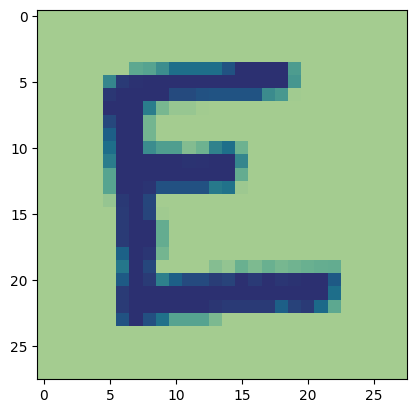

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Model Prediction:  E


In [14]:
letters = []
for i in range(65, 91):
    letter = chr(i)
    letters.append(letter)

random_index = 21000
plt.imshow(X.iloc[random_index].values.reshape(28, 28), cmap='crest')
plt.show()

prediction = model.predict(np.array([X.iloc[random_index].values]))
print('Model Prediction: ', letters[np.argmax(prediction)])

In [11]:
#This function just turns the users drawn image into the format which 
#is the same as that of the dataset which I trained on. 
def downsample(df, block_size):
    arr = df.to_numpy()

    new_height = arr.shape[0] // block_size
    new_width = arr.shape[1] // block_size

    new_arr = np.zeros((new_height, new_width), dtype=bool)

    for i in range(new_height):
        for j in range(new_width):
            vertical_slice = slice(i * block_size, (i + 1) * block_size)
            horizontal_slice = slice(j * block_size, (j + 1) * block_size)

            block = arr[vertical_slice, horizontal_slice]

            new_arr[i, j] = np.any(block)

    return pd.DataFrame(new_arr)


    '''
    lists = [[] for _ in range(28)]
    #df_lists = pd.DataFrame(np.nan, index=range(28), columns=range(28))

    for i in range(block_size):
        for j in range(block_size):
            all_vals = []
            for m in range(28):
                for n in range(28):
                    row = (i*28) + m
                    col = (j*28) + n
                    val = df.iloc[row, col]
                    all_vals.append(val)
            lists[i].append(all_vals)

    bool_list = pd.DataFrame(np.nan, index=range(28), columns=range(28))
    count_list = pd.DataFrame(np.nan, index=range(28), columns=range(28))

    for r in range(len(lists)):
        for c in range(len(lists[r])):
            count = sum(lists[r][c])
            if count > 0:
                bool_list.iloc[r, c] = True
            else:
                bool_list.iloc[r, c] = False
            count_list.iloc[r, c] = count

    return (bool_list, count_list)
    '''

In [15]:
#This just turns a dataframe in our usual formatting to an image
def df_to_image(df):
    array = df.to_numpy()
    #The next two lines came from chatGPT 3.5
    image_data = np.where(array, 0, 255).astype(np.uint8)
    img = Image.fromarray(image_data, 'L')  # 'L' mode for grayscale

    return img

C:\Users\SamV\AppData\Local\Temp\ipykernel_28612\2223934219.py:63: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  single_row_color = single_row_bool.applymap(lambda x: 255 if x else 0)


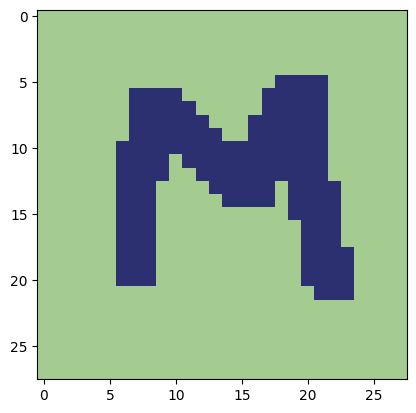

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Model Prediction:  M


In [21]:
pygame.init()

width, height = 28**2, 28**2  
background_color = (0, 0, 0)
draw_color = (255, 255, 255)
line_thickness = 2

#Set up the general window and stuff
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Draw Here!")
screen.fill(background_color)
clock = pygame.time.Clock()

drawing = False
running = True

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_RETURN:
                running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            drawing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            drawing = False
        elif event.type == pygame.MOUSEMOTION and drawing:
            pygame.draw.circle(screen, draw_color, event.pos, line_thickness)

    pygame.display.flip()
    clock.tick(60)

#Chat GPT 3.5 helped with the following 4 lines of code
buffer_string = pygame.image.tostring(screen, 'RGB')
image = pygame.image.fromstring(buffer_string, (width, height), 'RGB')
array = pygame.surfarray.array3d(image)

is_colored = np.any(array != np.array(background_color).reshape(1, 1, 3), axis=2)

df = pd.DataFrame(is_colored)
df_condensed = downsample(df, 28)

df_condensed = df_condensed.T #Because it was formatting and shaping it wrong otherwise
df_final = df_condensed.copy()

for r in range(len(df_condensed)):
    for c, col_name in enumerate(df_condensed.columns):
        surrounding_list = []
        for r_add in range(-1, 2):
            for c_add in range(-1, 2):
                if r+r_add != -1:
                    try:
                        surrounding_list.append(df_condensed.iat[r+r_add, c+c_add])
                    except IndexError:
                        pass
        if True in surrounding_list:
            df_final.at[r, c] = True

pygame.quit()

single_row_bool = pd.DataFrame(df_final.values.flatten()).T
single_row_color = single_row_bool.applymap(lambda x: 255 if x else 0)
single_row_color = single_row_color / 255

plt.imshow(single_row_color.iloc[0].values.reshape(28, 28), cmap='crest')
plt.show()

pred_v = model.predict(np.array([single_row_color.iloc[0].values]))
print('Model Prediction: ', letters[np.argmax(pred_v)])